In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns






In [8]:
df=pd.read_csv('wine_data.csv',header=None,usecols=(0,1,2))
df.columns=['Class_level','alcohol','mallic_acid']

In [9]:
df

,Class_level,alcohol,mallic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<AxesSubplot: xlabel='alcohol', ylabel='Density'>

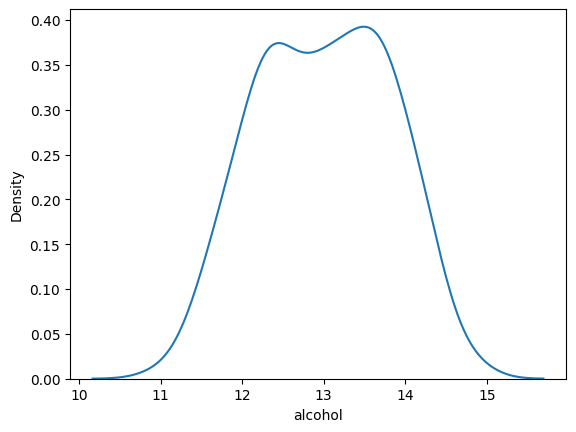

In [11]:
sns.kdeplot(df['alcohol'])

<AxesSubplot: xlabel='mallic_acid', ylabel='Density'>

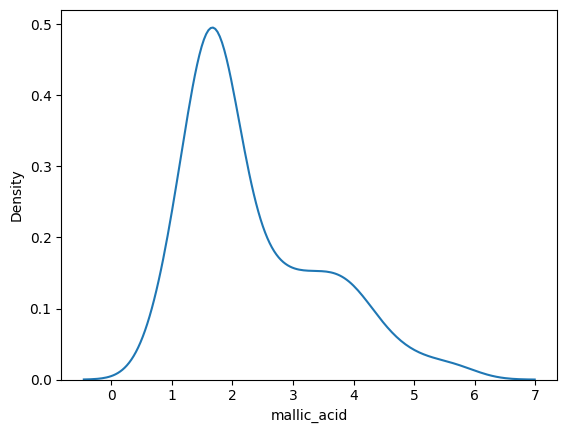

In [12]:
sns.kdeplot(df['mallic_acid'])

<AxesSubplot: xlabel='Class_level', ylabel='Density'>

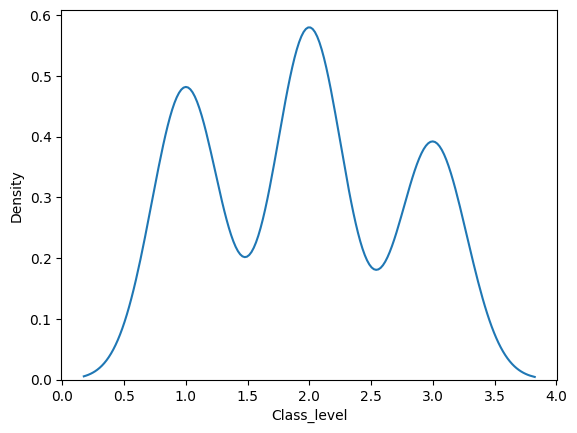

In [14]:
sns.kdeplot(df['Class_level'])

<AxesSubplot: xlabel='alcohol', ylabel='mallic_acid'>

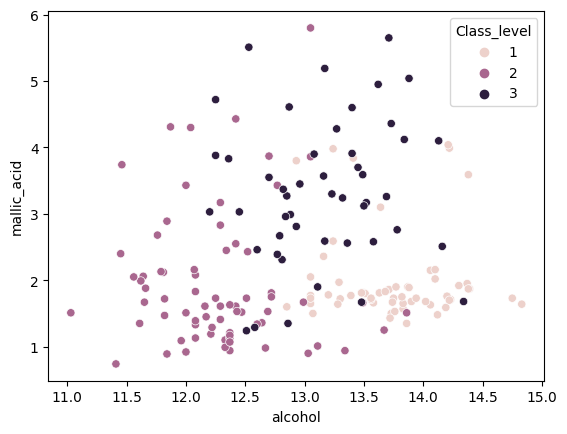

In [21]:
color_dict=(1=='red',2=='green',3=='blue')
sns.scatterplot(x=df['alcohol'],y=df['mallic_acid'],hue=df['Class_level'])


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Class_level',axis=1),df['Class_level'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [32]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [33]:
np.round(x_train.describe(),1)

,alcohol,mallic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [34]:
np.round(x_train_scaled.describe(),1)

,alcohol,mallic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


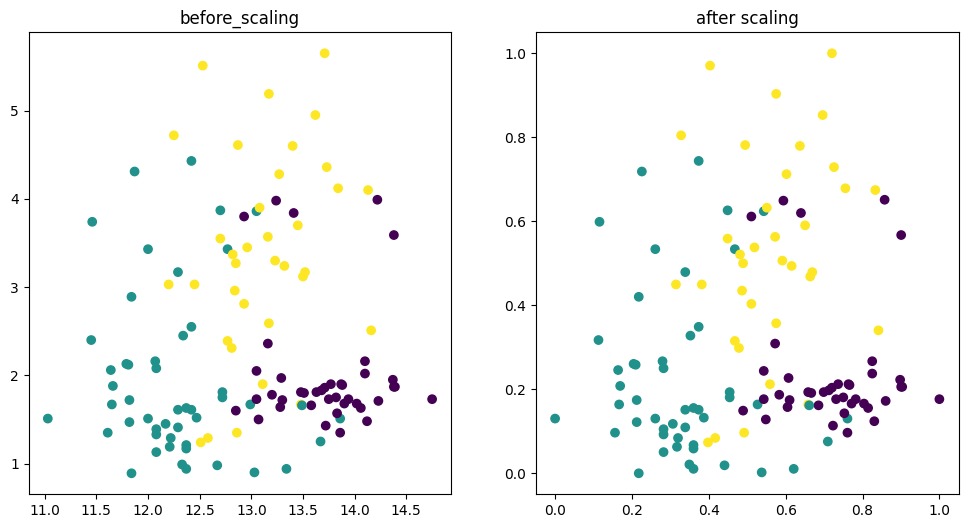

In [45]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,6))
ax1.scatter(x=x_train['alcohol'],y=x_train['mallic_acid'],c=y_train)
ax1.set_title('before_scaling')
ax2.scatter(x=x_train_scaled['alcohol'],y=x_train_scaled['mallic_acid'],c=y_train)
ax2.set_title('after scaling')
plt.show()